# Kaggle Credit Card Detection

The purpose of this project is to "Tell a data story about how classify highly unbalanced subset of credit card data into fraud and normal transcations". 

This jupiter note will have the following sections. 

1. Dataset-Background
2. Data Pre-processing
3. Model Implementation
4. Conclusion
5. References

# 1. Dataset-Background 
Quote from Kaggle: 

"The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the class (frauds) account for 0.172% of all transactions." 

Other information about the data: 
1. All inputs are in form of numerical values. 
2. To preserve the confidentiality of transaction information, kaggle team used PCA to transform all actual information into a form of numerical values aka principle components. 
3. The amount and time are the only features which have not been tranformed, where Time is in seconds elapsed between each transcation. 
4. The column "Class" contains response of every transcation where 0 indicates normal transaction and 1 indicates fraud one. 

Link to data: 

https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [1]:
# Importing libraries to used in this notebook
import sys
import pandas as pd
import numpy as np 
import datetime
import itertools
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline

import sklearn
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import StratifiedKFold,GridSearchCV

from sklearn.metrics import classification_report, consensus_score, roc_auc_score, make_scorer, accuracy_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix

from sklearn.metrics import confusion_matrix
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from numpy import where

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print("Imblearn", imblearn.__version__)
print('Matplotl: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(sns.__version__))

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Pandas: 1.0.1
Numpy: 1.18.1
Sklearn: 0.22.2
Imblearn 0.6.2
Matplotl: 3.1.3
Seaborn: 0.10.0


# 2. Data Pre-processing

## 2.1 Data Cleaning 

1. The credit Card transcations have 31 columns and 284807 rows. 
2. All the data are numerical values. 
3. There are not missing values so we can not removes data or do any sort of imputation. 
4. The class distribution of fraud or normal is highly imbalanced and skewed into normal transcations. There are 492 fraud transcation and 284315 normal transcation. 

In [2]:
# Reading the creditcard data 
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Getting the shape of the data 
df.shape

(284807, 31)

In [4]:
# Let's get some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

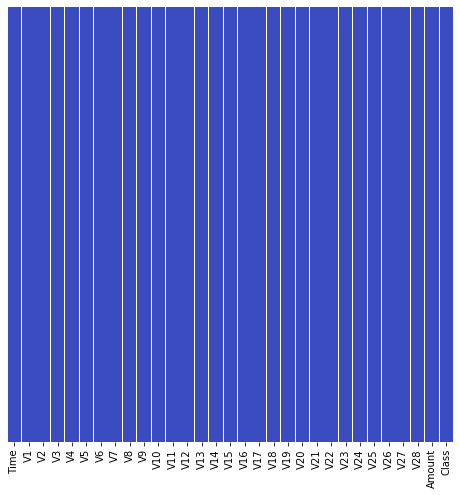

In [5]:
# Plotting heat map to check if there are any null values 
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

In [6]:
# Let's check the class distribution in the data: 
df.groupby('Class').count()['Amount']

Class
0    284315
1       492
Name: Amount, dtype: int64

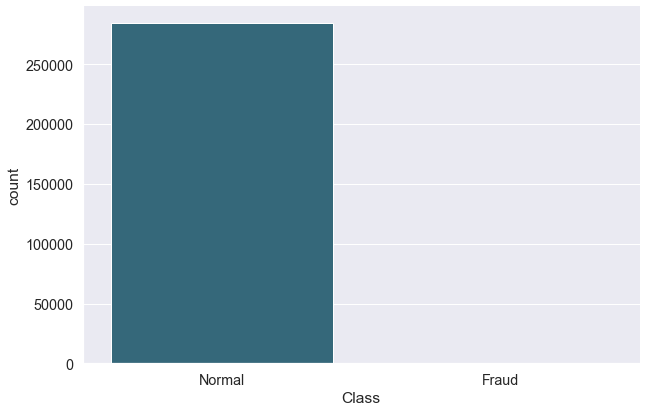

In [7]:
# Plotting the class distribution for better visualization
sns.set(style="darkgrid")
sns.set(font_scale=1.3)
g=sns.catplot(x="Class", data=df, kind="count", height=6, aspect=1.5, palette="PuBuGn_d")
(g.set_xticklabels(["Normal", "Fraud"]))
plt.show();

In [8]:
# Getting the normal and fraud transcation seperately in new dataframe
Normal = df[df["Class"]==0] 
Fraud = df[df["Class"]==1]

fraction = len(Fraud) / float(len(Normal))
print("The percentage of fraud transcation out of normal ones is:", fraction)

The percentage of fraud transcation out of normal ones is: 0.0017304750013189597


## 2.2 Investigating Amount and Time Columns

### 2.2.1 Transcation Amount

As expected normal transcations are more than the fraud ones. The statistics for normal transcation have a mean of 88.3, maximum value of 25,691.16, minimum value of 0.00. On the other hand, the statistics for fraud transcation have a mean of 122.21, maximum value of 2125.87 and a minimum value of 0.00.

The mean of fraud transcations is higher than noraml transcations due to the existance of a maximum value and the count is very samll causing a high mean compared to one in normal transcations.

The scatter plot for fraud transactions shows a range of common fraud transcations betwwen 0.00 and 200.00. This pattern could explain that currently existed credit card ML model classify "Countactless or Tap" transcations that exceed allowed amount (specified by the bank) as fraud. However, I can't make a solid conclusion or feature engineering based on this insight for the following reasons: 

1. Limited amount for countactless transcations was not declared from owner of data or by Kaggle.
        
2. Amount of allowed countactless trancations varies from bank to bank and it is more of country based.

3. The credit card data is not for a single person! It is for multiple people so I can't create any features that represent the trend in the transcation. 

In [9]:
# Getting the statistics of Normal and Fraud transcation amount: 
Normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
# Getting the statistics of Fraud transcation amount: 
Fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### 2.2.2 Transaction Time

The time behaviour for normal transcations follows a consistant normal trend. Since the data provided to us are only for 2 days, I can see that normal transcations start at begining of the day (0 seconds, and ends arround 100,000 seconds which is a cycle for one day, for second day it starts at 100,000 seconds and ends at 200,000 seconds) and ends at night. The peak for normal transcations is around 11:00 am till 7:00 pm and then starts to declain. In short, there is a fall in the density for normal transcations at begining and end of the day, while the a high density observed during working day hours. 

On the other hand, the time behaviour for fraud transcations has an interesting trend. For past 2 days where data was gathered, fraud transcations density is almost high with all equal time intervals. That is they are active all the time!

**Should I keep the Amount or the Time as input important feature? I will make final decision based after looking at the correlation matrix.**

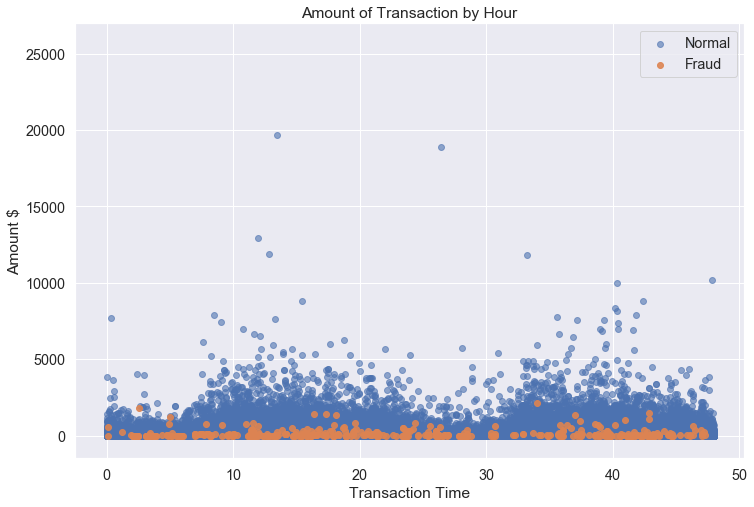

In [11]:
# Scatter plot of normal and fraud transcation
fig = plt.figure(figsize=(12,8))
plt.scatter((Normal.Time/(60*60)), Normal.Amount, alpha=0.6, label='Normal')
plt.scatter((Fraud.Time/(60*60)), Fraud.Amount, alpha=0.9, label='Fraud')
plt.title("Amount of Transaction by Hour")
plt.xlabel("Transaction Time")
plt.ylabel('Amount $')
ax.set_xlim([min(df["Amount"].values), max(df["Amount"].values)])
plt.legend(loc='upper right')
plt.show()

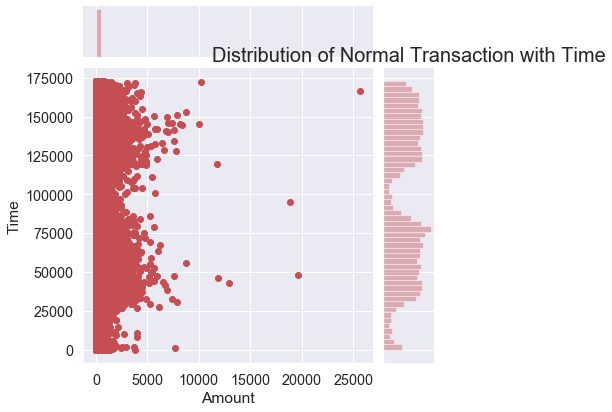

In [12]:
# Let's understand the Normal transcation behaviour with time 
sns.jointplot(x='Amount',y='Time',data=Normal,color='r')

ax.set_xlabel("Normal Amount $",fontsize=14)
ax.set_ylabel("Transaction Time",fontsize=14)
ax.set_xlim([min(Normal["Amount"].values), max(Normal["Amount"].values)])
ax.tick_params(labelsize=14)
plt.title("Distribution of Normal Transaction with Time",fontsize=20);

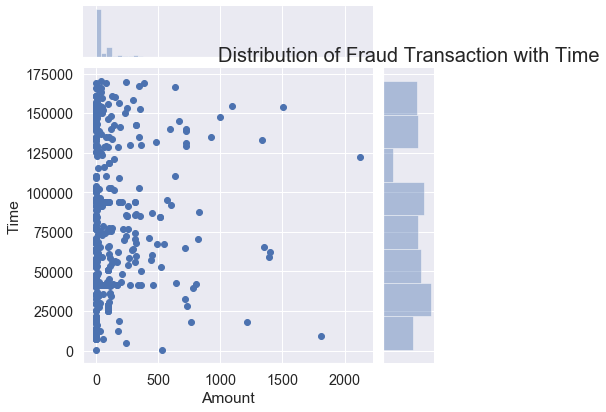

In [13]:
# Understanding the Fraud transcation behaviour with time
sns.jointplot(x='Amount',y='Time',data=Fraud,color='b')
ax.set_title("Distribution of Fraud Transaction",fontsize=20)
ax.set_xlabel("Fraud Amount $",fontsize=14)
ax.set_ylabel("Transaction Time",fontsize=14)
ax.set_xlim([min(Fraud["Amount"].values), max(Fraud["Amount"].values)])
ax.tick_params(labelsize=14)
plt.title("Distribution of Fraud Transaction with Time",fontsize=20);

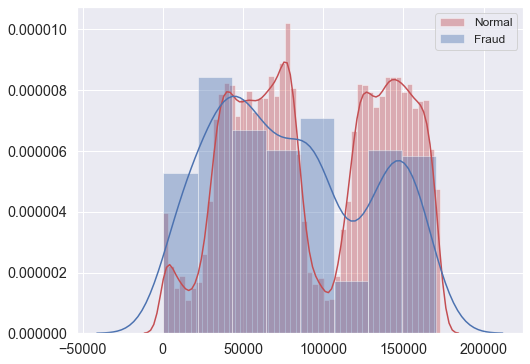

In [14]:
# Plotting the distribution of normal and fraud transcation
fig = plt.figure(figsize=(8,6))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
# ax3 =plt.subplot(2, 2, 2)
sns.distplot(Normal["Time"].values, color='r',label="Normal");
sns.distplot(Fraud["Time"].values, color='b',label="Fraud");
ax.axes.set_title("Distrbution of Noraml & Fraud Transaction Time",fontsize=20)
ax.set_xlabel("Time in Seconds for Normal",fontsize=14)
ax.set_ylabel("Frequency",fontsize=14)
ax.set_xlim([min(df["Time"].values), max(df["Time"].values)])
ax.tick_params(labelsize=14)
plt.legend(prop={'size': 12})
plt.show()


### 2.2.3 Correlation Matrix & Feature Selection

The overall corrlation of Amount and Class has a high positive correlation. Similarly, the same correlation can be seen in the fraud datasets. 

For the correlation of Time and Class, we can observed a zero correlation in all datasets. Similarly, the same correlation can be seen in the fraud dataset. 

**Conclusion:** 

1. The amount shows as an important feature and time is not. Thus, I will remove the Time column from input features list during training the model. 

2. Unfortunately, we can't do any feature importance or selection due to the fact that all provided features were transformed by PCA, and features are invariant to scale.  

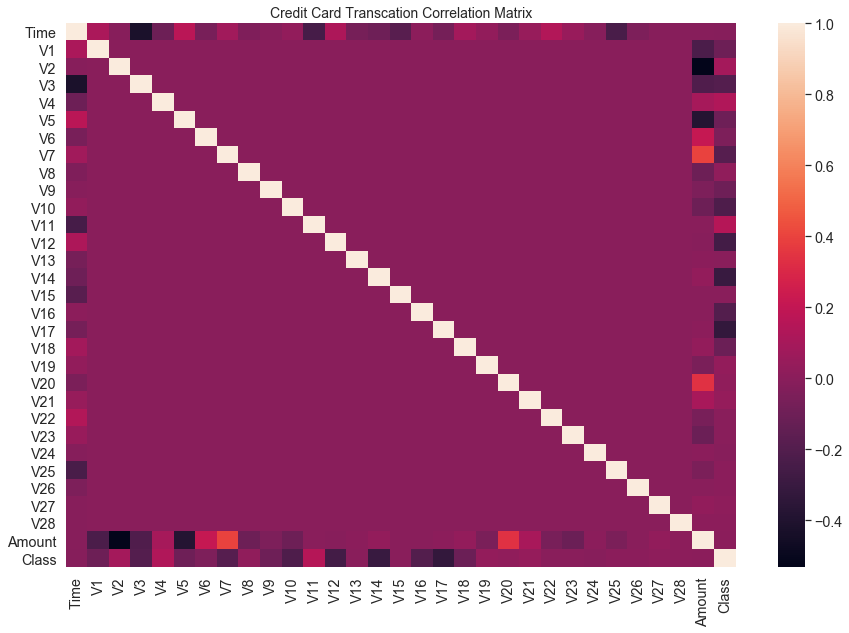

In [15]:
# Plotting the correlation matrix 
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot_kws={'size':20}, ax=ax)
ax.set_title("Credit Card Transcation Correlation Matrix", fontsize =14)
plt.show()

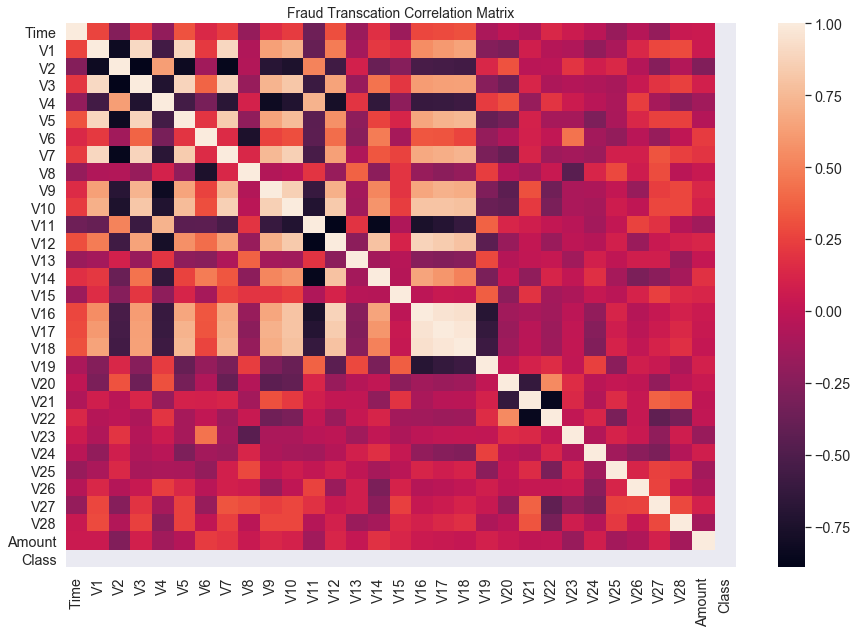

In [16]:
# Plotting the corrlation matrix to identify which feature has positive or negative correlation with fraud 
# Those ones could be extreme outliers!
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(Fraud.corr(), annot_kws={'size':20}, ax=ax)
ax.set_title("Fraud Transcation Correlation Matrix", fontsize =14)
plt.show()

# 3. Model Implementation

**Machine Learning Models:** 

In this section two ML classifiers will be trained to detect fraud transcations. I select Logistic Regression as one of the classifiers due to its ability to classify instance of classes based on predicting its probability of belonging to a specific class. The second model is Random Forest which is famous of creating uncorrelated large number of estimators (trees) which takes the vote of all trees to give single result. 

**Metrics:**

Since we are interested in making predictions for a two class classification problem, we have to fully understand the type of errors associated with classification to perfectly measure the model performance. However, it is recommended to use a metric accuracy for an unbalanced ratio dataset such as using Area Under the Precision-Recall Curve (AUPRC) which will return a meaningful accuracy for unbalance classification. 

For this project, I develope a function that performs GridSearch to measure precision score, recall score and area under the curve AUC.The idea behind measuring these scores is to experiment model perfromance under every score metric. For final testing of the model, I pass the models with best estimators obtained in GridSearch for **Recall Score** (Recall returns the amount of fraud cases our model is able to capture) and measure model performance on oringinal testing data based on the **Area under Precision-Recall Curve AUPRC**.    

Some expressin could be helpful to define:

*False Positive*: It means actual class is normal and incorrectly classified as fraud.

*True Positive*: It means actual class is normal and correctly classified as normal.

*False Negative*: It means actual class is fraud and incorrectly classified as normal. 

*True Negative*: It means actual class is fraud and correctly classified as fraud. 


As data provided is highly unbalanced, I am going to experiment model perfromance of several situations, as follows: 
1. Experimenting with Original Data.
2. Experimenting with Under-Sampling Data.
3. Experimenting with Over-Sampling (SMOTE) Data.
4. Experimenting with Combination of Over-Sampling & Under-Sampling Data.

**Initial resampling:**

Due to the fact that the given data is quite large and took longer time on my local machine to train a single model with single evaluation metric, I am going to only sample 50% of the given data to be used in training and testing. 

Since the data is highly imbalanced, I select the StratfiedKFold to split every fold for training and testing in equal percentage. That is in every fold the percentage of test sets class distribution is the same, this will make model perform better whenever we have unbalanced data. 

In [17]:
# Prepare the input features and target varible
# The input features
data = df.sample(frac=0.5, random_state=45)

# Getting the target varible
y = data['Class']

X = data.drop(['Class','Time'], axis=1)
# Transform the input such that it has a mean of zero and std of 1
# scaler = preprocessing.StandardScaler()

# X = scaler.fit_transform(X)
# Printing the shape of each varibles
print(X.shape,y.shape)

# Checking the class distribution 
y.value_counts()

(142404, 29) (142404,)


0    142143
1       261
Name: Class, dtype: int64

In [18]:
# Since data it is not balance, I will split it by using the StratifiedKfold to preserve the class in training and testing
state = 45
skfolds = StratifiedKFold(n_splits = 3, random_state=state,shuffle=True)
for train_index, test_index in skfolds.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
print(X_train.shape,y_train.shape) # Checking the shape of the new oversample data 
print(y_train.value_counts())

(94936, 29) (94936,)
0    94762
1      174
Name: Class, dtype: int64


## 3.1 Experimenting with Original Data

In [19]:
# A function to perform a gridsearch on specific model and its parameters to gridseach 
def clf_grid_search(model,param,score,Xt,Yt):
    # Record the start time 
    start = datetime.datetime.now()
    # Classifier parameters
    clf_params = param
    # Set of scoring metrics considered to evalute the gridsearch model
    scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'auc_score': make_scorer(roc_auc_score)
    }

    # Instinuate the gridsearch model
    grid_clf =GridSearchCV(model, clf_params,scoring=scorers, refit=score,cv=5, return_train_score=True,n_jobs=-1,verbose = 1) 
    # Fitting the gridsearch model
    grid_clf.fit(Xt, Yt)

    # We automatically get classifier with the best parameters.
    best_estimator = grid_clf.best_estimator_
    best_score = print("The best score obtained is",grid_clf.best_score_)
    
    # Printing the time taken to do gridsearch 
    end = datetime.datetime.now()
    Time = print("The GridSearch Time is: ",end-start)
    # Return the time and best estimators
    return best_score, Time, best_estimator

In [20]:
# A function to get model performance on original unseen data after being trained on best estimaotirs obtained from GridSearch 
def classifier_performance(best_estimators,xtrain,ytrain,xtest,ytest):

    # instiniate model with best estimators obtained from gridsearch on training model
    clf = best_estimators

    # Fitting the model
    clf.fit(xtrain, ytrain)
    # Getting the probability predicted class on training data 
    y_predt_clf = clf.predict_proba(xtrain)[:,1]
    # Evaluate model by measuring the Precision and Recall score on training data 
    clf_precision_tr, clf_recall_tr,_ = precision_recall_curve(ytrain, y_predt_clf)
    # Getting the area under the precision and recall curve
    clf_auc_train = auc(clf_recall_tr, clf_precision_tr)

    # Getting the probability predicted class on testing data 
    y_pred_clf = clf.predict_proba(xtest)[:,1]
    # Evaluate model by measuring the Precision and Recall score on original testing data 
    clf_precision, clf_recall, _ = precision_recall_curve(ytest, y_pred_clf)
    # Getting the area under the precision and recall curve on original testing data
    clf_auc = auc(clf_recall, clf_precision)

    # Printing the score obtained on original testing data
    print("The Area Under Precision Recal Curve on the Training Data is:", clf_auc_train)
    print("The Area Under Precision Recal Curve on the Original Testing Data is:", clf_auc)

    print('Confusion Matrix - Testing Dataset')
    print(pd.crosstab(ytest,clf.predict(xtest), rownames = ['True'], colnames = ['Predicted'], margins = True))
    print(classification_report(ytest,clf.predict(xtest),target_names = ['normal','fraud']))
    print("AUC: ","{:0.1%}".format(roc_auc_score(ytest,clf.predict(xtest))))
    
    # plot the precision-recall curves
    plt.plot(clf_recall_tr, clf_precision_tr, marker='.', label='Training')
    plt.plot(clf_recall, clf_precision, marker='.', label='Testing')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

### 3.1.1. Logistic Regression:

In [21]:
# Getting the gridsearch precision score for logistic regression model on sampled training data
lg_par={"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
_, _, estimatorlg_pr = clf_grid_search(model=LogisticRegression(),param=lg_par ,score='precision_score',Xt=X_train,Yt=y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   17.5s finished


The best score obtained is 0.8720657528378666
The GridSearch Time is:  0:00:19.138543


In [22]:
# Getting the gridsearch recall score for logistic regression model on sampled training data
_, _, estimatorlg_rc = clf_grid_search(model=LogisticRegression(),param=lg_par ,score='recall_score',Xt=X_train,Yt=y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:   10.6s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   13.7s finished


The best score obtained is 0.6260504201680672
The GridSearch Time is:  0:00:15.201132


In [23]:
# Getting the gridsearch auc score for logistic regression model on sampled training data
_, _, estimatorlg_auc = clf_grid_search(model=LogisticRegression(),param=lg_par ,score='auc_score',Xt=X_train,Yt=y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:   10.3s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   14.2s finished


The best score obtained is 0.8129302344141749
The GridSearch Time is:  0:00:15.600512


The Area Under Precision Recal Curve on the Training Data is: 0.7275218268051308
The Area Under Precision Recal Curve on the Original Testing Data is: 0.804034930204869
Confusion Matrix - Testing Dataset
Predicted      0   1    All
True                       
0          47378   3  47381
1             34  53     87
All        47412  56  47468
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     47381
       fraud       0.95      0.61      0.74        87

    accuracy                           1.00     47468
   macro avg       0.97      0.80      0.87     47468
weighted avg       1.00      1.00      1.00     47468

AUC:  80.5%


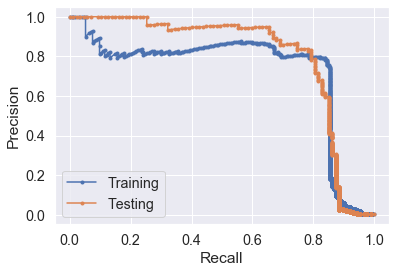

In [24]:
# Getting the classifier performance after being trained with best estimators based on auc and recall 
classifier_performance(best_estimators=estimatorlg_auc,xtrain=X_train,ytrain=y_train,xtest=X_test,ytest=y_test)

### 3.1.2. Random Forest:

In [25]:
# Getting the gridsearch precision score for randomforest model on sampled training data
rf_par = {'max_depth':[5,10,15,20],'min_samples_split' : [2, 5, 10],'min_samples_leaf' :[1,2,5,10]}

_, _, estimatorrf_pr = clf_grid_search(model=RandomForestClassifier(),param=rf_par ,score='precision_score',Xt=X_train,Yt=y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 27.5min finished


The best score obtained is 0.9589743589743589
The GridSearch Time is:  0:28:09.535198


In [26]:
# Getting the gridsearch recall score for Randomforest model on sampled training data
_, _, estimatorrf_rc = clf_grid_search(model=RandomForestClassifier(),param=rf_par ,score='recall_score',Xt=X_train,Yt=y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 28.1min finished


The best score obtained is 0.7818487394957983
The GridSearch Time is:  0:28:40.475907


In [27]:
# Getting the gridsearch auc score for Randomforest model on sampled training data
_, _, estimatorrf_auc = clf_grid_search(model=RandomForestClassifier(),param=rf_par ,score='auc_score',Xt=X_train,Yt=y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 29.4min finished


The best score obtained is 0.8908768813561725
The GridSearch Time is:  0:30:14.560580


The Area Under Precision Recal Curve on the Training Data is: 0.9705497044647309
The Area Under Precision Recal Curve on the Original Testing Data is: 0.8474722178897476
Confusion Matrix - Testing Dataset
Predicted      0   1    All
True                       
0          47377   4  47381
1             20  67     87
All        47397  71  47468
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     47381
       fraud       0.94      0.77      0.85        87

    accuracy                           1.00     47468
   macro avg       0.97      0.89      0.92     47468
weighted avg       1.00      1.00      1.00     47468

AUC:  88.5%


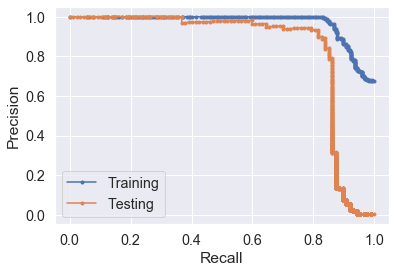

In [28]:
# Getting the classifier performance after being trained with best estimators based on auc and recall 
classifier_performance(best_estimators=estimatorrf_rc,xtrain=X_train,ytrain=y_train,xtest=X_test,ytest=y_test)

### 3.1.3 Results:

*Note: Both models were trained by best estimators obtained from GridSearch on Recall Score. The reason I use Recall score is that I am concern on building a model that more focus on detecting fraud transcation*

**Logistic Regression** 

1. The model achieved AUPRC accuracy of  72.7% on training dataset. 
2. The model achieved AUPRC accuracy of  80.4% on testing dataset.
3. The model achieved Recall score of 61%, that is it correctly classified 53 fraud cases out of 87 fruad cases, the remaining cases were incorrectly classified as normal transcations. 
4. The model incorrectly classifed 3 normal cases as fraud transcations. 
5. The model achieved f1-score of 74%. 
6. The model achieved AUC score of 80.5%.
  
**Random Forest** 

1. The model achieved AUPRC accuracy of  97% on training dataset. 
2. The model achieved AUPRC accuracy of  84.7% on testing dataset.
3. The model achieved Recall score of 77%, that is it correctly classified 67 fraud cases out of 87 fruad cases, the remaining cases were incorrectly classified as normal transcations. 
4. The model incorrectly classifed 4 normal cases as fraud transcations. 
5. The model achieved f1-score of 85%. 
6. The model achieved AUC score of 88.5%


Clearly Random Forest classifier outperfroms Logistic Regression classifier with a highier AUPRC score on both training and testing data. In additon, the f1-score for Random Forest classifier is relatively highier than Logistic Regression on testing data. 

**For highly imbalance data and using only 50% of overall dataset to developed this model, I beleive that an Area Under Precision-Recall Curve of 84.7% is very good and it indicates how model was able to detect interactions between PCA transformed features**. 

## 3.2 Experimenting with Under-Sampling

In this section I will resample the training data by undersample the majority class by using the NearMiss. Undersampling majority means I will remove some data points from training data to balance class distribution. NearMiss version 1 here used which implies that the majority class examples with minimum average distance to three closest minority class examples [1],[3]. 

A dataframe is created to ensure all data points are matched with its corresponding class, more classical traditional way!

In [29]:
# define the undersampling method
undersample = NearMiss(sampling_strategy='majority',version=1, n_neighbors=3)
# transform the dataset
x_train_us,y_train_us = undersample.fit_resample(X_train, y_train) 
# summarize the new class distribution
print("Class distribution after undersampling with NearMiss version3 is:",Counter(y_train_us))

Class distribution after undersampling with NearMiss version3 is: Counter({0: 174, 1: 174})


In [30]:
# A function to return new data after doing any sort of sampling
def get_new_data(x,y):
    # Here we will work to establsih a dataframe only for training
    train_df = pd.DataFrame.from_records(x) # Convert oversample x_train to dataframe
    # Rename the columns of x_train as ones in original data
    columns = [c for c in df.columns.tolist() if c not in ["Time","Class"]]
    train_df.columns = columns
    # Converting the oversampled train target to dataframe
    train_target = pd.DataFrame(y)
    train_target.columns = ['Class']
    
    # Getting final merged balanced train data
    data = pd.merge(left=train_df, left_index=True, right=train_target, right_index=True,how='inner')
    print("Final shape of oversampled balanced training data is", data.shape)
    print("Class distribution in new train data",Counter(data.Class))
    
    # Returning final train data as DataFrame
    return data

In [31]:
# Under-Sampled dataframe
us_df = get_new_data(x_train_us,y_train_us)

Final shape of oversampled balanced training data is (348, 30)
Class distribution in new train data Counter({0: 174, 1: 174})


In [32]:
# Undersampling before cross validating (prone to overfit)
X_us = us_df.drop('Class', axis=1)
y_us = us_df['Class']

# This is explicitly used for split undersampling data.
# Xu_train, Xu_test, yu_train, yu_test = train_test_split(X_us, y_us, test_size=0.3, random_state=42)

### 3.2.1 Logistic Regression:

In [33]:
# Getting the gridsearch precision score for logistic regression model on undersampled training data
_, _, estimatorlg_pr_us = clf_grid_search(model=LogisticRegression(),param=lg_par ,score='precision_score',Xt=X_us,Yt=y_us)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.1s remaining:    0.0s


The best score obtained is 1.0
The GridSearch Time is:  0:00:00.234292


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.1s finished


In [34]:
# Getting the gridsearch recall score for logistic regression model on undersampled training data
_, _, estimatorlg_rc_us = clf_grid_search(model=LogisticRegression(),param=lg_par ,score='recall_score',Xt=X_us,Yt=y_us)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits
The best score obtained is 0.9426890756302522
The GridSearch Time is:  0:00:00.260849


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.1s finished


In [35]:
# Getting the gridsearch auc score for logistic regression model on undersampled training data
_, _, estimatorlg_auc_us = clf_grid_search(model=LogisticRegression(),param=lg_par ,score='auc_score',Xt=X_us,Yt=y_us)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits
The best score obtained is 0.9684873949579831
The GridSearch Time is:  0:00:00.271842


[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished


The Area Under Precision Recal Curve on the Training Data is: 0.9954662008715174
The Area Under Precision Recal Curve on the Original Testing Data is: 0.2322883985632272
Confusion Matrix - Testing Dataset
Predicted      0      1    All
True                          
0          12551  34830  47381
1              7     80     87
All        12558  34910  47468
              precision    recall  f1-score   support

      normal       1.00      0.26      0.42     47381
       fraud       0.00      0.92      0.00        87

    accuracy                           0.27     47468
   macro avg       0.50      0.59      0.21     47468
weighted avg       1.00      0.27      0.42     47468

AUC:  59.2%


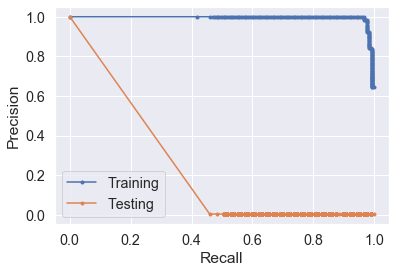

In [36]:
# Getting the classifier performance after being trained with best estimators based on recall undersampled data 
classifier_performance(best_estimators=estimatorlg_rc_us,xtrain=X_us,ytrain=y_us,xtest=X_test,ytest=y_test)

### 3.2.2 Random Forest:

In [37]:
_, _, estimatorrf_pr_us = clf_grid_search(model=RandomForestClassifier(),param=rf_par ,score='precision_score',Xt=X_us,Yt=y_us)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.1s


The best score obtained is 1.0
The GridSearch Time is:  0:00:10.929044


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   10.7s finished


In [38]:
_, _, estimatorrf_rc_us = clf_grid_search(model=RandomForestClassifier(),param=rf_par ,score='recall_score',Xt=X_us,Yt=y_us)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.6s


The best score obtained is 0.96
The GridSearch Time is:  0:00:11.438108


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   11.2s finished


In [39]:
_, _, estimatorrf_auc_us = clf_grid_search(model=RandomForestClassifier(),param=rf_par ,score='auc_score',Xt=X_us,Yt=y_us)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.9s


The best score obtained is 0.9771428571428572
The GridSearch Time is:  0:00:11.731950


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   11.5s finished


The Area Under Precision Recal Curve on the Training Data is: 1.0
The Area Under Precision Recal Curve on the Original Testing Data is: 0.5608553280570113
Confusion Matrix - Testing Dataset
Predicted     0      1    All
True                         
0          2054  45327  47381
1             2     85     87
All        2056  45412  47468
              precision    recall  f1-score   support

      normal       1.00      0.04      0.08     47381
       fraud       0.00      0.98      0.00        87

    accuracy                           0.05     47468
   macro avg       0.50      0.51      0.04     47468
weighted avg       1.00      0.05      0.08     47468

AUC:  51.0%


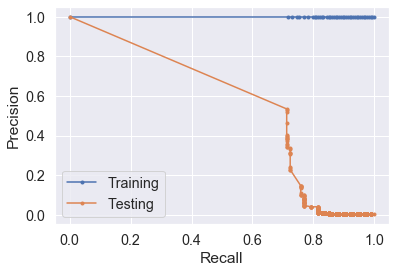

In [40]:
# Getting the classifier performance after being trained with best estimators based on recall undersampled data 
classifier_performance(best_estimators=estimatorrf_rc_us,xtrain=X_us,ytrain=y_us,xtest=X_test,ytest=y_test)

### 3.2.3 Results:

*Note: Both models were fed by best estimators obtained from GridSearch on Recall Score. The reason I used Recall score is that I was concern on building a model that more focus on detecting fraud transcation*

**Logistic Regression** 

1. The model achieved AUPRC accuracy of  99.5% on training dataset. 
2. The model achieved AUPRC accuracy of  23.2% on testing dataset.
3. The model achieved Recall score of 92%, that is it correctly classified 80 fraud cases out of 87 fruad cases, the remaining cases were incorrectly classified as normal transcations. 
4. The model incorrectly classifed 34830 normal cases as fraud transcations. 
5. The model achieved f1-score of 0.0%. 
6. The model achieved AUC score of 59.2%.
  
**Random Forest** 

1. The model achieved AUPRC accuracy of  100.0% on training dataset. 
2. The model achieved AUPRC accuracy of  56.1% on testing dataset.
3. The model achieved Recall score of 98%, that is it correctly classified 85 fraud cases out of 87 fruad cases, the remaining cases were incorrectly classified as normal transcations. 
4. The model incorrectly classifed 45327 normal cases as fraud transcations. 
5. The model achieved f1-score of 0.0%.
6. The model achieved AUC score of 51.0%


It can be seen that both models obtained a very low score in AUPRC, even though they have a very high recall score. We would be in trouble if we had considred recall score only. Under-sampling majority results in lossing a lot of important features that highly contribute in making an accurate classification. In additon, the training data is less than testing data causing the model to perform poorly. In fact, it is only able to classify the minority class (87 Fraud Transcations). 

**In short, undersampling makes model perfrom poorly. Maybe I have to try another effective way to under-sample and make testing data less than or equal to training data. However, I am still not convinced that under-sampling would be a good approach to deal with imbalance data, data may loss important features!**. 

## 3.3 Experimenting with Oversampling with SMOTE

In this section I will resample the training data by overersample the minority class by using SMOTE. Oversampling the minority means I will create Synthetic data points from existed ones on training data to balance class distribution. However, it does not provide any additional information to current existed data points, you can think of it as a duplicate of existed points [2],[4].

In [41]:
oversample = SMOTE(sampling_strategy="minority", random_state=state)
# transform the dataset
x_train_os, y_train_os = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
print("Class distribution after oversampling minority:",Counter(y_train_os))

Class distribution after oversampling minority: Counter({0: 94762, 1: 94762})


In [42]:
os_df = get_new_data(x_train_os,y_train_os)

Final shape of oversampled balanced training data is (189524, 30)
Class distribution in new train data Counter({0: 94762, 1: 94762})


In [43]:
# Oversampling before cross validating (prone to overfit)
X_os = os_df.drop('Class', axis=1)
y_os = os_df['Class']
# Our data is already scaled we should split our training and test set
# This is explicitly used for undersampling.
# Xo_train, Xo_test, yo_train, yo_test = train_test_split(X_os, y_os, test_size=0.5, random_state=42)

### 3.3.1 Logistic Regression:

In [44]:
# Getting the gridsearch precision score for logistic regression model on oversampled training data
_, _, estimatorlg_pr_os = clf_grid_search(model=LogisticRegression(),param=lg_par ,score='precision_score',Xt=X_os,Yt=y_os)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:   20.6s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   28.3s finished


The best score obtained is 0.9846691137628044
The GridSearch Time is:  0:00:31.306538


In [45]:
# Getting the gridsearch recall score for logistic regression model on oversampled training data
_, _, estimatorlg_rc_os = clf_grid_search(model=LogisticRegression(),param=lg_par ,score='recall_score',Xt=X_os,Yt=y_os)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   29.4s finished


The best score obtained is 0.9500010774024398
The GridSearch Time is:  0:00:32.624544


In [46]:
# Getting the gridsearch auc score for logistic regression model on oversampled training data
_, _, estimatorlg_auc_os = clf_grid_search(model=LogisticRegression(),param=lg_par ,score='auc_score',Xt=X_os,Yt=y_os)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   28.6s finished


The best score obtained is 0.9667007868233826
The GridSearch Time is:  0:00:31.747703


The Area Under Precision Recal Curve on the Training Data is: 0.9957985474540995
The Area Under Precision Recal Curve on the Original Testing Data is: 0.8428373196316031
Confusion Matrix - Testing Dataset
Predicted      0    1    All
True                        
0          46548  833  47381
1              8   79     87
All        46556  912  47468
              precision    recall  f1-score   support

      normal       1.00      0.98      0.99     47381
       fraud       0.09      0.91      0.16        87

    accuracy                           0.98     47468
   macro avg       0.54      0.95      0.57     47468
weighted avg       1.00      0.98      0.99     47468

AUC:  94.5%


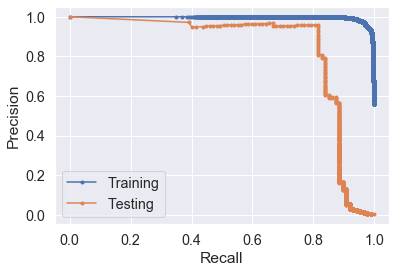

In [47]:
# Getting the classifier performance after being trained with best estimators based on recall overersampled data 
classifier_performance(best_estimators=estimatorlg_rc_os,xtrain=X_os,ytrain=y_os,xtest=X_test,ytest=y_test)

### 3.3.2 Random Forest:

In [48]:
_, _, estimatorrf_pr_os = clf_grid_search(model=RandomForestClassifier(),param=rf_par ,score='precision_score',Xt=X_os,Yt=y_os)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 61.4min finished


The best score obtained is 0.9997995769394912
The GridSearch Time is:  1:02:58.391607


In [49]:
_, _, estimatorrf_re_os = clf_grid_search(model=RandomForestClassifier(),param=rf_par ,score='recall_score',Xt=X_os,Yt=y_os)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 60.4min finished


The best score obtained is 1.0
The GridSearch Time is:  1:01:59.659165


In [50]:
_, _, estimatorrf_auc_os = clf_grid_search(model=RandomForestClassifier(),param=rf_par ,score='auc_score',Xt=X_os,Yt=y_os)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 60.4min finished


The best score obtained is 0.9999103005397123
The GridSearch Time is:  1:01:49.831386


The Area Under Precision Recal Curve on the Training Data is: 0.9999999762744511
The Area Under Precision Recal Curve on the Original Testing Data is: 0.8361015603401869
Confusion Matrix - Testing Dataset
Predicted      0   1    All
True                       
0          47373   8  47381
1             15  72     87
All        47388  80  47468
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     47381
       fraud       0.90      0.83      0.86        87

    accuracy                           1.00     47468
   macro avg       0.95      0.91      0.93     47468
weighted avg       1.00      1.00      1.00     47468

AUC:  91.4%


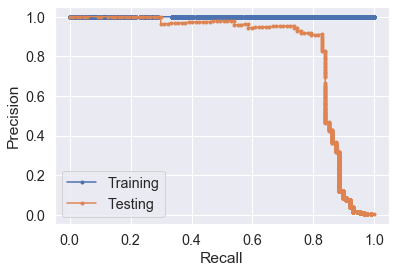

In [51]:
# Getting the classifier performance after being trained with best estimators based on recall overersampled data 
classifier_performance(best_estimators=estimatorrf_re_os,xtrain=X_os,ytrain=y_os,xtest=X_test,ytest=y_test)

### 3.3.3 Results:

*Note: Both models were fed by best estimators obtained from GridSearch on Recall Score. The reason I used Recall score is that I was concern on building a model that focus on detecting fraud transcation*

**Logistic Regression** 

1. The model achieved AUPRC accuracy of  99.5% on training dataset. 
2. The model achieved AUPRC accuracy of  84.3% on testing dataset.
3. The model achieved Recall score of 91%, that is it correctly classified 79 fraud cases out of 87 fruad cases, the remaining cases were incorrectly classified as normal transcations. 
4. The model incorrectly classifed 833 normal cases as fraud transcations. 
5. The model achieved f1-score of 16.0%. 
6. The model achieved AUC score of 94.5%.
  
**Random Forest** 

1. The model achieved AUPRC accuracy of  99.9% on training dataset. 
2. The model achieved AUPRC accuracy of  83.6% on testing dataset.
3. The model achieved Recall score of 83%, that is it correctly classified 72 fraud cases out of 87 fruad cases, the remaining cases were incorrectly classified as normal transcations. 
4. The model incorrectly classifed 8 normal cases as fraud transcations. 
5. The model achieved f1-score of 86%.
6. The model achieved AUC score of 91.4%


Wow! Oversampling technique gives very good results compared to undersampling. However, we can see a trade-off between precision and recall, that is trade-off between the false positive cases (Normal Transcations classified as Fraud) and true negative (Fraud transcations classified as Fraud). If we would compare AUPRC score on the unseen testing data, both models almost achieved similar score. Clearly, Logistic Regression outperforms Random Forest in Recall score, it is able to detected more fraud cases, however, it incorrectly classifies 833 Normal transcations as Fraud. Random Forest incorrectly classifies 8 Normal transcations as Fraud and misclassifies 7 Fraud cases which are more than that of Logistic Regression. Finally, f1-score for Logistic Regression is very low relative to Random Forest f1-score.And this is due to the high recall and low precision. 

**To sum up, it depends on the cost of false positive and false negative to decide which model to select. If a financial insituation cares about a model that detects more fraud transcations regardless of false positive transcations (Nomal transcation classied as Fraud) then Logistic Regression model with oversampling is the right one. However, if a financial instituate cares about a balance between false positive and false negative along with a very good AUPRC accuracy, then Random Forest is the best option here!**

## 3.4 Experimenting with Combination of Over & Under Sampling

In this section I will resample the training data by first overersample the minority class by 1/10 ratio then undersample the majority class by 1/2 ratio. Doing so, it just diversifies data points and make training data having a reasonable class distribution different from sever imbalance one. However, it does not provide any additional information to current existed data points, you can think of it as a duplicate of existed points and we are not lossing a lot of important data points [2],[4],[5].

In [52]:
# Instinate SMOTE
osm = SMOTE(sampling_strategy=0.1, random_state=state)
usm = RandomUnderSampler(sampling_strategy=0.5)
# Fit model to new varaibles
steps = [('o', osm), ('u', usm)]
pipeline = Pipeline(steps=steps)
x_train_ous,y_train_ous = pipeline.fit_resample(X_train,y_train)
print("Shape of new balance data:",x_train_ous.shape,y_train_ous.shape)
print("Balance calss after oversampling:",Counter(y_train_ous))

Shape of new balance data: (28428, 29) (28428,)
Balance calss after oversampling: Counter({0: 18952, 1: 9476})


In [53]:
ous_df = get_new_data(x_train_ous,y_train_ous)

Final shape of oversampled balanced training data is (28428, 30)
Class distribution in new train data Counter({0: 18952, 1: 9476})


In [54]:
# Oversampling before cross validating (prone to overfit)
X_ous = os_df.drop('Class', axis=1)
y_ous = os_df['Class']
# Our data is already scaled we should split our training and test sets


# This is explicitly used for undersampling.
# Xous_train, Xous_test, yous_train, yous_test = train_test_split(X_ous, y_ous, test_size=0.3, random_state=42)

### 3.4.1 Logistic Regression:

In [55]:
# Getting the gridsearch precision score for logistic regression model on oversampled training data
_, _, estimatorlg_pr_ous = clf_grid_search(model=LogisticRegression(),param=lg_par ,score='precision_score',Xt=X_ous,Yt=y_ous)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:   20.8s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   26.5s finished


The best score obtained is 0.9846691137628044
The GridSearch Time is:  0:00:29.187602


In [56]:
# Getting the gridsearch recall score for logistic regression model on oversampled training data
_, _, estimatorlg_rc_ous = clf_grid_search(model=LogisticRegression(),param=lg_par ,score='recall_score',Xt=X_ous,Yt=y_ous)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   26.8s finished


The best score obtained is 0.9500010774024398
The GridSearch Time is:  0:00:29.736867


In [57]:
# Getting the gridsearch auc score for logistic regression model on oversampled training data
_, _, estimatorlg_auc_ous = clf_grid_search(model=LogisticRegression(),param=lg_par ,score='auc_score',Xt=X_ous,Yt=y_ous)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   27.2s finished


The best score obtained is 0.9667007868233826
The GridSearch Time is:  0:00:30.075211


The Area Under Precision Recal Curve on the Training Data is: 0.9957985474540995
The Area Under Precision Recal Curve on the Original Testing Data is: 0.8428373196316031
Confusion Matrix - Testing Dataset
Predicted      0    1    All
True                        
0          46548  833  47381
1              8   79     87
All        46556  912  47468
              precision    recall  f1-score   support

      normal       1.00      0.98      0.99     47381
       fraud       0.09      0.91      0.16        87

    accuracy                           0.98     47468
   macro avg       0.54      0.95      0.57     47468
weighted avg       1.00      0.98      0.99     47468

AUC:  94.5%


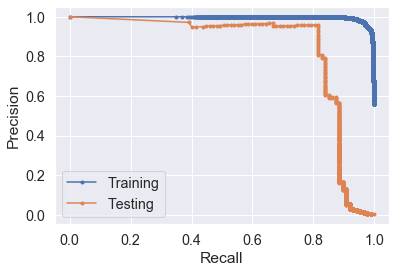

In [58]:
# Getting the classifier performance after being trained with best estimators based on recall overersampled data 
classifier_performance(best_estimators=estimatorlg_rc_ous,xtrain=X_ous,ytrain=y_ous,xtest=X_test,ytest=y_test)

### 3.4.2 Random Forest:

In [59]:
_, _, estimatorrf_pr_ous = clf_grid_search(model=RandomForestClassifier(),param=rf_par ,score='precision_score',Xt=X_ous,Yt=y_ous)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 58.4min finished


The best score obtained is 0.9997995769394912
The GridSearch Time is:  0:59:50.034249


In [60]:
_, _, estimatorrf_rc_ous = clf_grid_search(model=RandomForestClassifier(),param=rf_par ,score='recall_score',Xt=X_ous,Yt=y_ous)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 56.0min finished


The best score obtained is 1.0
The GridSearch Time is:  0:57:26.802372


In [61]:
_, _, estimatorrf_auc_ous = clf_grid_search(model=RandomForestClassifier(),param=rf_par ,score='auc_score',Xt=X_ous,Yt=y_ous)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 55.7min finished


The best score obtained is 0.9998997478421717
The GridSearch Time is:  0:57:09.501052


The Area Under Precision Recal Curve on the Training Data is: 0.9999999920919673
The Area Under Precision Recal Curve on the Original Testing Data is: 0.8322299794284257
Confusion Matrix - Testing Dataset
Predicted      0   1    All
True                       
0          47375   6  47381
1             15  72     87
All        47390  78  47468
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     47381
       fraud       0.92      0.83      0.87        87

    accuracy                           1.00     47468
   macro avg       0.96      0.91      0.94     47468
weighted avg       1.00      1.00      1.00     47468

AUC:  91.4%


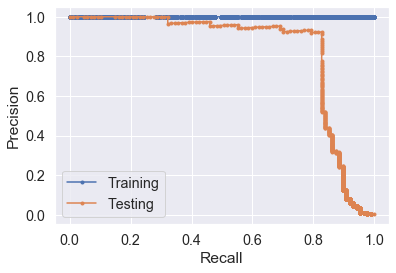

In [62]:
# Getting the classifier performance after being trained with best estimators based on recall overersampled data 
classifier_performance(best_estimators=estimatorrf_rc_ous,xtrain=X_ous,ytrain=y_ous,xtest=X_test,ytest=y_test)

### 3.4.3 Results:

*Note: Both models were fed by best estimators obtained from GridSearch on Recall Score. The reason I used Recall score is that I was concern on building a model that focus on detecting fraud transcations*

**Logistic Regression** 

1. The model achieved AUPRC accuracy of  99.5% on training dataset. 
2. The model achieved AUPRC accuracy of  84.3% on testing dataset.
3. The model achieved Recall score of 91%, that is it correctly classified 79 fraud cases out of 87 fruad cases, the remaining cases were incorrectly classified as normal transcations. 
4. The model incorrectly classifed 833 normal cases as fraud transcations. 
5. The model achieved f1-score of 16.0%. 
6. The model achieved AUC score of 94.5%.
  
**Random Forest** 

1. The model achieved AUPRC accuracy of  99.9% on training dataset. 
2. The model achieved AUPRC accuracy of  83.2% on testing dataset.
3. The model achieved Recall score of 83%, that is it correctly classified 72 fraud cases out of 87 fruad cases, the remaining cases were incorrectly classified as normal transcations. 
4. The model incorrectly classifed 6 normal cases as fraud transcations. 
5. The model achieved f1-score of 87%.
6. The model achieved AUC score of 91.4%

Performing oversampling on minority and then undersampling the majority does not improve the results at all. In fact, the output results are almost the same as the ones obtained during oversampling. The only score that is improved by 1% is the f-score for Random Forest model.
 

**To sum up, it depends on the cost of false positive and false negative to decide which model to select. If a financial insituation cares about a model that detects more fraud transcations regardless of false positive transcations (Nomal transcation classied as Fraud) then Logistic Regression model with oversampling is the right one. However, if a financial instituate cares about a balance between false positive and false negative along with a very good AUPRC accuracy, then Random Forest is the best option here!**

# 4. Conclusion

As the objective of this project is to build a model that can effectively predict fraud transcations based on more reliable perfromance metric, I select the recall score as an initial metric to perform GridSearch and obtain the best estimators. Then, evaluating the model performance based on the Area Under Precision-Recall Curve as it provides more balance between precision and recall trade-off. Other metrics were considered to give further insight into model measurments.

I have experimented different approach to deal with imbalance data and boost machine learning model performance accuracy, and I will summarize them in the following points: 

1. Undersampling apparoch does not boost the accuracy. In fact, the model performs well only on training dataset, while performed poorly on testing datasets. My conclusion on this is that when we undersampled the data, we lost a lot of important features that play a significant role on classification. Thus, when the model tries to predict on testing data which contains some features that are not seen or trained previously, the model could not classified them properly. AUPRC of 23.2% for Logistic Regresison is even below the random threshould and AUPRC of 56% for Random Forest is not good enough at all. Therefore, I would not recommend to do undersampling to boost imbalance data for this project. 

2. For Oversampling and Combination of Oversampling and Undersampling, both approaches achieve similar results. The accuracy is almost simililar to results obteined from experimenting on orginal dataset for Random Forest. However, combination of oversampling and undersampling allows model to do better at detecting Fraud Transcations. 

3. Experimenting on Original Data, Random Forest gives very good results compared to Logistic Regression. The AUPRC accuracy is 84.7% and it detects 67 Fraud Transcations from 87 ones. In additon, it incorrectly classifies only 40 Normal Transactions as Fraud. 

So which one to go with?

**After analyzing the above results, I personally beleive that Combination of Oversampling & Undersampling with Random Forest outperfroms Logistic Regression in every experiment. This could be confusing for some people as we have seen that Logistic Regression does great job at detecting Fraud Transactions than Random Forest. However, Logistic Regression has a lot of False Positives (833 Normal Transcations incorrectly classified as Fraud), this could be inconvient for some clients as their transcations will be blocked! On the other hand, Random Forest provides a balance trade-off in Precision-Recall where AUPRC accuracy is 83.2%, only 6 Normal transactions are incorrectly classified as Fraud, and it incorrectly classifies 15 fraud cases as normal while Logistic Regression incorrectly classifies 8 Fraud cases as Normal ones. What matters to me as Data Scientist is to build a model that can capture interactions between input features to perform effectively on relaibale parameter inputs. I can not make judgment on how much it costs a financial instituate 15 fraud transcations, however, would you go with a model that can cost you lossing a valuable (833) clients?!** 

I end my discussion here, I am open to hear your feedback on my discussion and my results. In addition, I would be grateful if someone from financial industry could give some insight about my conclusion, would you go with a model that give high false positives or more true negatives?

Please vote if you find this helpful! 

# 5. References 

1. https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/ 
2. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ 
3. https://towardsdatascience.com/sampling-techniques-for-extremely-imbalanced-data-part-ii-over-sampling-d61b43bc4879
4. https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html
5. https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/ 
6. http://blog.re-work.co/imbalanced-data-and-credit-card-fraud-detection/ 
7. http://www.davidsbatista.net/blog/2018/08/19/NLP_Metrics/ 